# Figure 7. Fit in mice and monkeys




In [7]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats
from scipy.interpolate import interp1d
import os
import functions_optimal as fun
import pandas as pd

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)

area=4.0;linethicknes=1.0;

font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

data_mice=np.loadtxt('Mice_with_trials.txt');
data_monkeys=np.loadtxt('Monkeys_with_trials.txt');

data_both_species=[data_mice,data_monkeys]
# structure of data set is:
# unit number, contrast, laser, rate, other stuff

dataset_both_species,Con_both_species,nCon_both_species,normalization_both_species=[],[],[],[]
for idx_species in range(2):
    dataset,Con,nCon=fun.build_dataset(data_both_species[idx_species])
    normalization=1.0;#np.mean(dataset[0,:,0])
    dataset_both_species=dataset_both_species+[dataset]
    Con_both_species=Con_both_species+[Con]
    nCon_both_species=nCon_both_species+[nCon]
    
species=['Mice','Monkeys']
color=['c','m']

results=np.loadtxt('simulate_best_fits/results.txt');
sim_param_all=results[:,0:15]
moments_of_r_sim_all=results[:,15:20]
sim_convergence_all=results[:,20:24]
tau_decay=results[:,26]
sim_decay_all=results[:,26]/results[:,27]
sim_species=results[:,28]
sim_combined=results[:,29]

sim_curr_E=results[:,30]
sim_curr_I=results[:,31]
sim_curr_tot=results[:,32]
sim_curr_opto=results[:,33]


Possible_Tmax_over_tau_E=np.unique(sim_param_all[:,14])
Possible_sigma_Lambda_over_Lambda=np.unique(sim_param_all[:,10])
Possible_r_X=np.unique(sim_param_all[:,12])
Possible_J=np.unique(sim_param_all[:,11])



Once deleted, variables cannot be recovered. Proceed (y/[n])?  n


Nothing done.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# recover simulated params

In [3]:
simulation_param = pd.read_csv('simulate_best_fits/simulation_param.txt',delim_whitespace=True) #header=None
print(simulation_param.keys())
simulation_param=simulation_param.to_numpy()


Index(['J', 'r_X', 'sigma_Lambda_over_Lambda', 'Tmax_over_tau_E', 'sigma_t',
       'tau_rp', 'g_E', 'g_I', 'beta', 'K', 'ell', 'CV_K', 'idx_species',
       'idx_combined'],
      dtype='object')


In [10]:

idx_combined=0;
for idx_species in [0,1]:
    print(['mice','monkeys'][idx_species])

    mask_case=(simulation_param[:,-2]==idx_species)&(simulation_param[:,-1]==idx_combined)
    J=np.unique(simulation_param[mask_case,0])[0]
    sigma_Lambda_over_Lambda=np.unique(simulation_param[mask_case,2])[0]
    g_E=np.unique(simulation_param[mask_case,6])[0]
    g_I=np.unique(simulation_param[mask_case,7])[0]
    beta=np.unique(simulation_param[mask_case,8])[0]
    CV_K=np.unique(simulation_param[mask_case,11])[0]

    r_X=np.unique(simulation_param[mask_case,1])
    ell=np.unique(simulation_param[mask_case,10])


    print('J=',J,r'$\sigma_{\lambda}/\lambda$=',sigma_Lambda_over_Lambda,
          'g_E=',g_E,'g_I=',g_I,'beta=',beta,'CV_K=',CV_K)
    print('r_X=',r_X)
    print('ell=',ell)

mice
J= 0.0001325098747091 $\sigma_{\lambda}/\lambda$= 0.7852976206468583 g_E= 9.972540734940784 g_I= 8.399857837811428 beta= 0.3337711948490606 CV_K= 0.0199846588484741
r_X= [ 7.22  7.8   8.2   8.69  8.97 10.45 13.65]
ell= [4.14]
monkeys
J= 0.0004432519877516 $\sigma_{\lambda}/\lambda$= 6.561565376532942 g_E= 4.58230438517752 g_I= 2.728729673586847 beta= 0.8067002563887169 CV_K= 0.0072868099196249
r_X= [14.41 30.3  37.01 42.52 44.84 48.24]
ell= [2.51]


0 0
2.331892852428746 2.331892852428746
1.3436401205300488 3.675532972958795
3.8299478480361224 7.505480820994917
1.1206412063189783 8.626122027313896
1.3307338181850883 9.956855845498984
0.40539086958332865 10.362246715082312
    10.362246715082312
0 1
1.1583849785366451 1.1583849785366451
1.7023828982154576 2.860767876752103
3.166660753455097 6.0274286302072
4.833088926936121 10.860517557143321
2.218325196315792 13.078842753459114
0.8184922892795607 13.897335042738675
    13.897335042738675
1 0
8.480663947167836 8.480663947167836
1.1268854754074904 9.607549422575326
4.894168538660943 14.50171796123627
2.0731422882981994 16.57486024953447
6.336627108354907 22.911487357889378
0.5152387084007264 23.426726066290104
    23.426726066290104
1 1
2.6989265009007797 2.6989265009007797
2.214593461020648 4.913519961921428
1.3017619062168981 6.215281868138326
5.308132249488109 11.523414117626434
1.7893890093309335 13.312803126957368
6.582156183422521 19.89495931037989
    19.89495931037989


"\npic_name='Figure_7_fits.pdf'\nfig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)\npic_name='Figure_7_fits.png'\nfig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)\n"

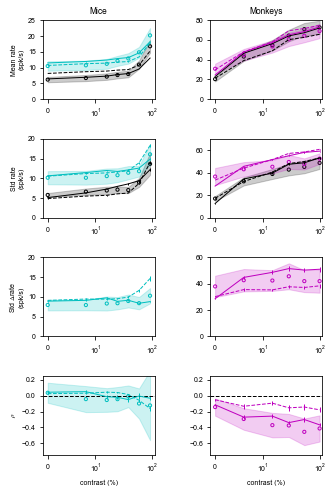

In [4]:

rows=4
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()



for idx_species in range(2):
    dataset=dataset_both_species[idx_species]
    Con=Con_both_species[idx_species]
    nCon=nCon_both_species[idx_species]
         
    for idx_moment in range(6):
        if idx_moment<2:
            idx_row=0
            ccc=['k',colors[idx_species]][idx_moment]
            ymin=0
            ymax=[25,80][idx_species]
            
        if (idx_moment>=2)&(idx_moment<4):
            idx_row=1
            ccc=['k',colors[idx_species]][idx_moment-2]
            ymin=0
            #ymax=[20,60][idx_species]
            ymax=[20,70][idx_species]
         
        if (idx_moment==4):
            idx_row=2
            ccc=colors[idx_species]
            ymin=0
            ymax=[20,60][idx_species]
         
        if (idx_moment==5):
            idx_row=3
            ccc=colors[idx_species]
            ymin=-0.75
            ymax=0.25
                     
        m,sem=dataset[idx_moment,:,0],dataset[idx_moment,:,1]
        axs[2*idx_row+idx_species].scatter(Con,m,
                                           facecolors='none', s=10,edgecolors=ccc,marker='o'
                                           )
        axs[2*idx_row+idx_species].fill_between(Con,m-sem,m+sem,
                                                 color=ccc,alpha=0.2)
    
        axs[2*idx_row+idx_species].set_xscale('symlog', linthreshx=12)
        axs[2*idx_row+idx_species].axis([-1.,110,ymin,ymax])
    axs[2*idx_row+idx_species].axhline(y=0,ls='--',c='k')
    axs[2*3+idx_species].set_xlabel('contrast (%)')
    axs[2*0+idx_species].set_title(['Mice','Monkeys'][idx_species])
    if idx_species==0:
        axs[2*0].set_ylabel('Mean rate\n(spk/s)')
        axs[2*1].set_ylabel('Std rate\n(spk/s)')
        axs[2*2].set_ylabel('Std $\Delta$rate\n(spk/s)')
        axs[2*3].set_ylabel(r'$\rho$')
        
  
for idx_combined in [0,1]:
    ls=['-','--'][idx_combined]
    for idx_species in [0,1]:
        print(idx_combined,idx_species)
        dataset=dataset_both_species[idx_species]
        Con=Con_both_species[idx_species]
        nCon=nCon_both_species[idx_species]
            
        mask_cases=(sim_species==idx_species)&(sim_combined==idx_combined)

        data_x=sim_param_all[mask_cases,12]
        cost=0
        for idx_moment in range(6):
            clr=color[idx_species]

            if idx_moment==0:
                data_y=moments_of_r_sim_all[mask_cases,0]
                idx_plot=2*0+idx_species
                clr='k'
            if idx_moment==1:
                data_y=moments_of_r_sim_all[mask_cases,0]+moments_of_r_sim_all[mask_cases,1]
                idx_plot=2*0+idx_species
            if idx_moment==2:
                data_y=moments_of_r_sim_all[mask_cases,2]
                idx_plot=2*1+idx_species
                clr='k'
            if idx_moment==3:
                data_y=np.sqrt(moments_of_r_sim_all[mask_cases,2]**2
                               +moments_of_r_sim_all[mask_cases,3]**2
                               +2*moments_of_r_sim_all[mask_cases,4])
                idx_plot=2*1+idx_species
            if idx_moment==4:
                data_y=moments_of_r_sim_all[mask_cases,3]
                idx_plot=2*2+idx_species

            if idx_moment==5:
                data_y=moments_of_r_sim_all[mask_cases,4]/moments_of_r_sim_all[mask_cases,3]**2
                idx_plot=2*3+idx_species


            data_y_med=np.zeros((len(np.unique(data_x)),3))
            for idx in range(len(np.unique(data_x))):
                mask_x=data_x==np.unique(data_x)[idx]
                data_y_med[idx,0]=np.mean(data_y[mask_x])
                data_y_med[idx,1]=stats.sem(data_y[mask_x])
            axs[idx_plot].errorbar(Con,data_y_med[:,0],data_y_med[:,1],c=clr,ls=ls) 
            cost_moment=(data_y_med[:,0]-dataset[idx_moment,:,0])/dataset[idx_moment,:,1]
            cost_moment=(0.5*(np.sum(cost_moment**2)))
            cost=cost+cost_moment
            print(cost_moment,cost)
        print('   ',cost)


fig.set_size_inches(2.5*cols,2.*rows)
'''
pic_name='Figure_7_fits.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)
pic_name='Figure_7_fits.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)
'''

0 0
0 1
1 0
1 1


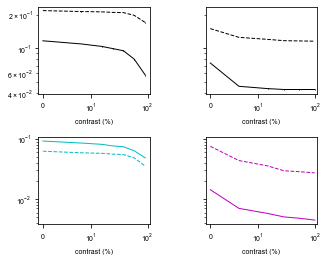

In [12]:
 
rows=2
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), 
                        facecolor='w', edgecolor='k',sharey='row')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


for idx_combined in [0,1]:
    ls=['-','--'][idx_combined]
    for idx_species in [0,1]:
        print(idx_combined,idx_species)
        dataset=dataset_both_species[idx_species]
        Con=Con_both_species[idx_species]
        nCon=nCon_both_species[idx_species]
            
        mask_cases=(sim_species==idx_species)&(sim_combined==idx_combined)

        data_x=sim_param_all[mask_cases,12]
        cost=0
        for idx_case in range(2):
            clr=color[idx_species]

            if idx_case==0:
                data_y=np.abs(sim_curr_tot/sim_curr_E)[mask_cases,]
                clr='k'
            if idx_case==1:
                data_y=np.abs(sim_curr_opto/sim_curr_E)[mask_cases,]

            idx_plot=2*idx_case+idx_species
            data_y_med=np.zeros((len(np.unique(data_x)),3))
            for idx in range(len(np.unique(data_x))):
                mask_x=data_x==np.unique(data_x)[idx]
                data_y_med[idx,0]=np.mean(data_y[mask_x])
                data_y_med[idx,1]=stats.sem(data_y[mask_x])
            axs[idx_plot].errorbar(Con,data_y_med[:,0],data_y_med[:,1],c=clr,ls=ls) 

            axs[idx_plot].set_xscale('symlog', linthreshx=12)
            axs[idx_plot].set_yscale('log', )
            axs[idx_plot].set_xlim([-1.,110])
            axs[idx_plot].set_xlabel('contrast (%)')
    
fig.set_size_inches(2.5*cols,2.*rows)
'''
pic_name='Figure_7_currents.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)
pic_name='Figure_7_currents.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)
'''

# look at $\tau_{decay}$

0 0
0 1
1 0
1 1


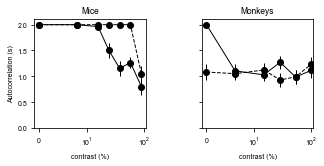

In [19]:
 
rows=1
cols=2

colors=['c','m']
fig, axs = plt.subplots(rows,cols, figsize=(2.5*cols,2.*rows), 
                        facecolor='w', edgecolor='k',sharey='row')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


for idx_combined in [0,1]:
    ls=['-','--'][idx_combined]
    for idx_species in [0,1]:
        print(idx_combined,idx_species)
        dataset=dataset_both_species[idx_species]
        Con=Con_both_species[idx_species]
        nCon=nCon_both_species[idx_species]
            
        mask_cases=(sim_species==idx_species)&(sim_combined==idx_combined)

        data_x=sim_param_all[mask_cases,12]
        cost=0
        for idx_case in range(1):
            clr=color[idx_species]

            if idx_case==0:
                data_y=tau_decay[mask_cases,]
                clr='k'
            if idx_case==1:
                data_y=sim_decay_all[mask_cases,]

            idx_plot=2*idx_case+idx_species
            data_y_med=np.zeros((len(np.unique(data_x)),3))
            for idx in range(len(np.unique(data_x))):
                mask_x=data_x==np.unique(data_x)[idx]
                data_y_med[idx,0]=np.mean(data_y[mask_x])
                data_y_med[idx,1]=stats.sem(data_y[mask_x])
            axs[idx_plot].errorbar(Con,data_y_med[:,0],data_y_med[:,1],c=clr,ls=ls,marker='o') 

            axs[idx_plot].set_xscale('symlog', linthreshx=12)
            #axs[idx_plot].set_yscale('log', )
            axs[idx_plot].set_xlim([-1.,110])
            axs[idx_plot].set_xlabel('contrast (%)')
        axs[idx_plot].set_title(['Mice','Monkeys'][idx_species])

axs[0].set_ylabel('Autocorrelation (s)')        
axs[0].set_ylim([0,2.1])

fig.set_size_inches(2.5*cols,2.*rows)


#'''
pic_name='Chaos_in_fig_5.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight', dpi=300)
pic_name='Chaos_in_fig_5.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)
#'''